 <h1 align=center><font size = 5> Análisis exploratorio y descriptivo </font></h1>
 
 *El análisis exploratorio de datos engloba un conjunto de técnicas para comprender de manera rápida la naturaleza de una colección de Datos*

**Oscar Andres Gaspar Alvarez**



**Medellin - Junio 2020**


<a id="ref7"></a>

## Tabla de contenido

* <p><a href="#ref1"> 1) Descripción del problema abordar </a></p>
* <p><a href="#ref2"> 2) Descripción de Datos </a></p>
* <p><a href="#ref3"> 3) Análisis estadístico </a></p>
* <p><a href="#ref4"> 4) Análisis componentes Principales </a></p>
* <p><a href="#ref5"> 5) Algoritmos de agrupación o cluster </a></p>
* <p><a href="#ref6"> 5) Conclusiones </a></p>


<a id="ref1"></a>
## 1) Comprender la dinamica de la economia Mundial
<p><a href="#ref7"><font color = red size = 3> Inicio</font> </a></p>



Nuestra representación mental del mundo se ha anclado a una cierta forma al mapa mundial, donde la separación de los dos países constituyentes se basa en las fronteras geográficas. Si bien dos países pueden estar cerca por distancia física, las características que definen sus respectivos sistemas económicos en un momento determinado pueden ser drásticamente diferentes.

<img src="https://www.etapainfantil.com/wp-content/uploads/2015/11/Mapamundi-pol%C3%ADtico-para-imprimir.jpg" width=300, align = "center">

Para comprender el estado y la relación de las economías globales debemos aventurarnos más profundamente que la asociación por geografía. Y a medida que el mundo se tambalea  al borde de la recesión por causa del Covid19, la necesidad de este entendimiento nunca ha sido más pertinente.

El siguiente trabajo se enfoca en realizar un análisis exploratorio y descriptivo de los datos, de los principales indicadores Macroeconómicos de los países. y a través de análisis de reducción de dimensionalidad encontrar las variables más relevantes con respecto a sus economías y además por medio de algoritmos de agrupación encontrar esos grupos similares de países con respecto a las variables económicas.

<a id="ref2"></a>
## 2)  Descripción de Datos
<p><a href="#ref7"><font color = red size = 4> Inicio</font> </a></p>


Para comprender las economías, tomamos un vector de variables macroeconómicas importantes que definen el estado de cada economía. Las variables incluyen datos macroeconómicos importantes como el crecimiento, la inflación, el desempleo, la producción industrial, la inflación y el equilibrio presupuestario.

Fuente: https://www.economist.com/economic-and-financial-indicators/2018/03/20/economic-and-financial-indicators

<a id="ref3"></a>
## 3)  Análisis estadístico
<p><a href="#ref7"><font color = red size = 4> Inicio</font> </a></p>


**Importamos Datos**

In [1]:
rm(list = ls())
options(warn=-1)
Ruta_Proyecto <- "D:/Usuarios/oscagaal/Maestria Metodos Cuantitativos/Analisis Exploratorio de Datos/TRABAJO FINAL"
setwd(paste0(Ruta_Proyecto,"/INSUMOS"))
source(list.files(pattern="LIBRERIAS"))
fin_indicators0219 <- read.csv("fin_indicators0219.csv")
fin_indicators0220 <- read.csv("fin_indicators0220.csv")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date



Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:reshape2':

    dcast, melt


The following objects are masked from 'package:dplyr':

    between, first, last



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'fdth'


The following objects are masked from 'package:stats':

    sd, var



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths


Loading required package

#### Diccionario de variables
Tenemos una base de datos desde el **año 2019 con Indicadores economicos para el mes de Febrero** Que contiene **47 Paises**  y 9 Indicadores Económicos
La base contiene **10 Variables:**

1.	**'Country' :** Nombre País
2.	**'GDP_Latest' :** Pib Mas reciente hasta la Fecha.
3.	**'Industrial.Produc':** Prodcuto Industrial se incluyen los productos o servicios obtenidos por factores productivos residentes en el país de medición.
4.	**'CPI':** Índice de Precios al Consumidor ( IPC ).
5.	**'Unemployment':** Tasa de Desempleo.
6.	**'Trade.Balance':** La balanza comercial o balanza de mercancías es el registro económico de un país donde se recogen las importaciones y exportaciones de mercancías, es decir, son los ingresos menos los pagos del comercio de mercancías de un país.
7.	**'current_account':** Balanza de Cuenta Corriente, indicador económico que resume el flujo de todos los bienes, servicios, ingresos y pagos desde y hacia el país.
8.	**'budget.balanc':** Balance del presupuesto.
9.	**'short.rates' :** as tasas de interés a corto plazo son las tasas a las que se efectúan los préstamos a corto plazo entre las instituciones financieras o la tasa a la que se emiten o negocian en el mercado papeles gubernamentales a corto plazo.
10.	**'long.rates':** Las tasas de interés a largo plazo se refieren a bonos gubernamentales con vencimiento en diez años.


In [2]:
head(fin_indicators0219)
levels(fin_indicators0219$Country)
print(dim(fin_indicators0219))
print(dim(fin_indicators0220))

,Country,GDP_Latest,Industrial.Product,CPI,Unemployment,Trade.Balance,current_account,budget.balanc,short.rates,long.rates
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,United States,3.0,4.0,1.9,4.0,-874.0,-2.4,-3.8,2.70,2.66
2,China,6.4,5.7,1.9,3.8,351.8,0.3,-3.9,2.90,2.91
3,Japan,0.0,-1.9,0.3,2.4,10.8,3.7,-3.5,0.00,0.00
4,Britain,1.3,-0.8,2.1,4.0,-185.2,-3.9,-1.3,0.88,1.23
5,Canada,2.1,1.8,2.0,5.8,-17.0,-2.8,-2.2,2.10,1.88
6,Euro area,1.2,-3.3,1.6,7.9,236.7,3.5,-0.7,0.00,0.09


[1] "Argentina"      "Australia"      "Austria"        "Belgium"       
 [5] "Brazil"         "Britain"        "Canada"         "Chile"         
 [9] "China"          "Colombia"       "Czech Republic" "Denmark"       
[13] "Euro area"      "Finland"        "France"         "Germany"       
[17] "Greece"         "Hong Kong"      "Hungary"        "India"         
[21] "Indonesia"      "Ireland"        "Israel"         "Italy"         
[25] "Japan"          "Lithuania"      "Malaysia"       "Mexico"        
[29] "Netherlands"    "New Zealand"    "Norway"         "Peru"          
[33] "Philippines"    "Poland"         "Portugal"       "Russia"        
[37] "Singapore"      "Slovakia"       "South Africa"   "South Korea"   
[41] "Spain"          "Sweden"         "Switzerland"    "Thailand"      
[45] "Turkey"         "United States"  "Vietnam"

[1] 47 10
[1] 46 10


**Histograma del PIB**

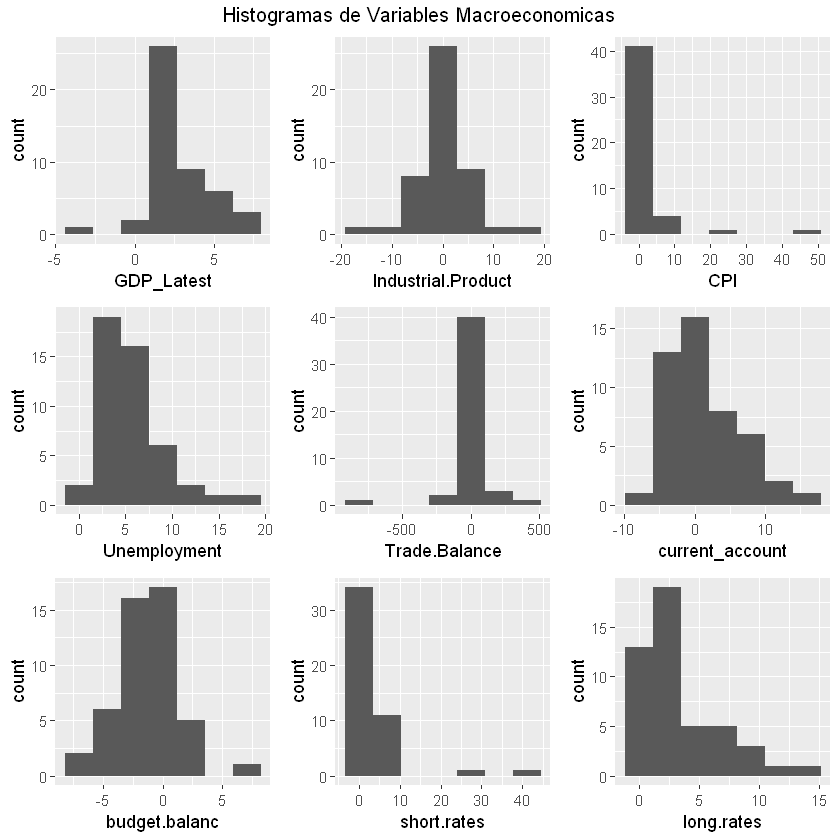

In [3]:
bin=7
V1 <- ggplot(data = fin_indicators0219, aes(GDP_Latest))+geom_histogram(bins=bin) 
V2 <-ggplot(data = fin_indicators0219, aes(Industrial.Product))+ geom_histogram(bins=bin) 
V3 <-ggplot(data = fin_indicators0219, aes(CPI))+ geom_histogram(bins=bin) 
V4 <-ggplot(data = fin_indicators0219, aes(Unemployment))+ geom_histogram(bins=bin) 
V5 <-ggplot(data = fin_indicators0219, aes(Trade.Balance))+ geom_histogram(bins=bin) 
V6 <-ggplot(data = fin_indicators0219, aes(current_account))+ geom_histogram(bins=bin) 
V7 <-ggplot(data = fin_indicators0219, aes(budget.balanc))+ geom_histogram(bins=bin) 
V8 <-ggplot(data = fin_indicators0219, aes(short.rates))+ geom_histogram(bins=bin) 
V9 <-ggplot(data = fin_indicators0219, aes(long.rates))+ geom_histogram(bins=bin) 


grid.arrange(V1,V2,V3,V4,V5,V6,V7,V8,V9, nrow = 3,top='Histogramas de Variables Macroeconomicas')



**Resumen Estadistico Para Año 2019 a corte de Febrero**

In [4]:
summary(fin_indicators0219)

      Country     GDP_Latest     Industrial.Product      CPI        
 Argentina: 1   Min.   :-3.500   Min.   :-18.0000   Min.   : 0.200  
 Australia: 1   1st Qu.: 1.650   1st Qu.: -2.2000   1st Qu.: 1.050  
 Austria  : 1   Median : 2.400   Median :  1.0000   Median : 1.900  
 Belgium  : 1   Mean   : 2.675   Mean   :  0.3362   Mean   : 3.251  
 Brazil   : 1   3rd Qu.: 3.100   3rd Qu.:  2.7000   3rd Qu.: 2.600  
 Britain  : 1   Max.   : 7.120   Max.   : 15.0000   Max.   :47.100  
 (Other)  :41                                                       
  Unemployment    Trade.Balance      current_account  budget.balanc  
 Min.   : 0.000   Min.   :-874.000   Min.   :-6.000   Min.   :-7.10  
 1st Qu.: 3.600   1st Qu.: -15.350   1st Qu.:-2.400   1st Qu.:-2.75  
 Median : 5.000   Median :   3.000   Median : 0.500   Median :-1.30  
 Mean   : 5.587   Mean   :  -1.211   Mean   : 1.321   Mean   :-1.34  
 3rd Qu.: 6.700   3rd Qu.:  30.950   3rd Qu.: 3.250   3rd Qu.:-0.10  
 Max.   :18.000   Max.   : 3

**Barplot por Paises y Pib 2019**

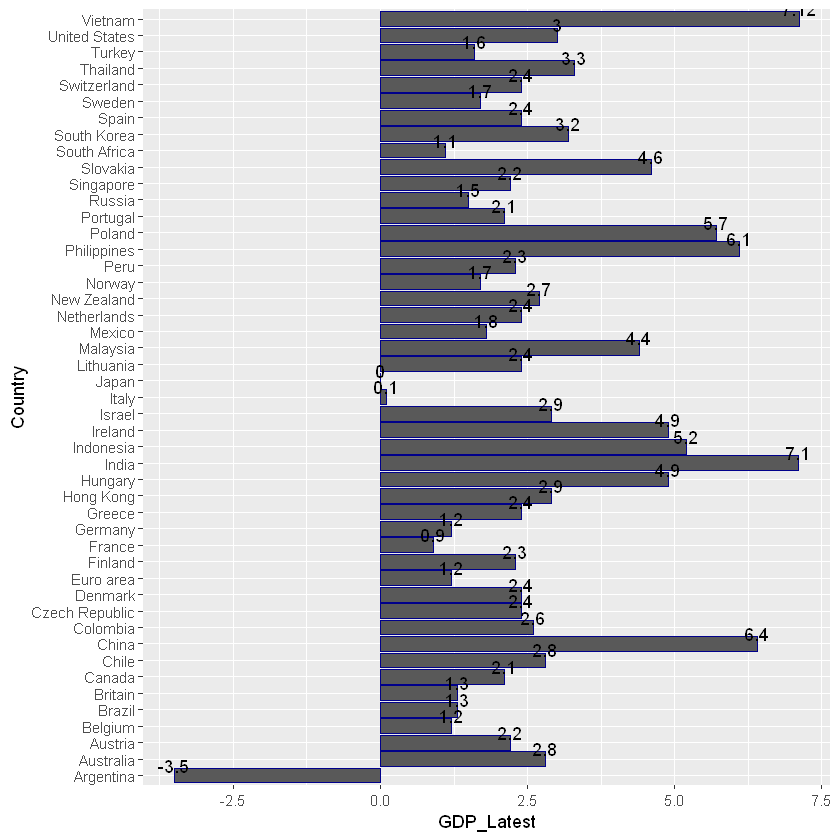

In [5]:

ggplot(fin_indicators0219, aes(x=Country, y=GDP_Latest)) + 
  geom_bar(color="darkblue",stat = "identity") +
  coord_flip()+geom_text(aes(label=GDP_Latest), position=position_dodge(width=0.9), vjust=-0.25)


**Resumen Estadistico Para Año 2020 a corte de Marzo**

In [6]:
summary(fin_indicators0220)

      Country     GDP_Latest     Industrial.Product      CPI        
 Argentina: 1   Min.   :-6.800   Min.   :-5.700     Min.   :-0.500  
 Australia: 1   1st Qu.: 0.575   1st Qu.:-1.375     1st Qu.: 0.600  
 Austria  : 1   Median : 1.650   Median :-0.350     Median : 1.650  
 Belgium  : 1   Mean   : 1.680   Mean   : 1.226     Mean   : 3.074  
 Brazil   : 1   3rd Qu.: 2.300   3rd Qu.: 3.675     3rd Qu.: 3.275  
 Britain  : 1   Max.   : 7.000   Max.   :11.700     Max.   :48.400  
 (Other)  :40                                                       
  Unemployment    current_account   budget.balance         GDP        
 Min.   : 1.100   Min.   :-5.4000   Min.   :-14.800   Min.   : 0.000  
 1st Qu.: 3.700   1st Qu.:-2.0750   1st Qu.: -6.875   1st Qu.: 0.000  
 Median : 5.150   Median :-0.1000   Median : -5.500   Median : 0.640  
 Mean   : 6.418   Mean   : 0.5978   Mean   : -6.020   Mean   : 1.973  
 3rd Qu.: 7.800   3rd Qu.: 2.6250   3rd Qu.: -4.550   3rd Qu.: 2.700  
 Max.   :29.100   Max.

**Barplot por Paises y Pib 2020 Con corte Marzo**

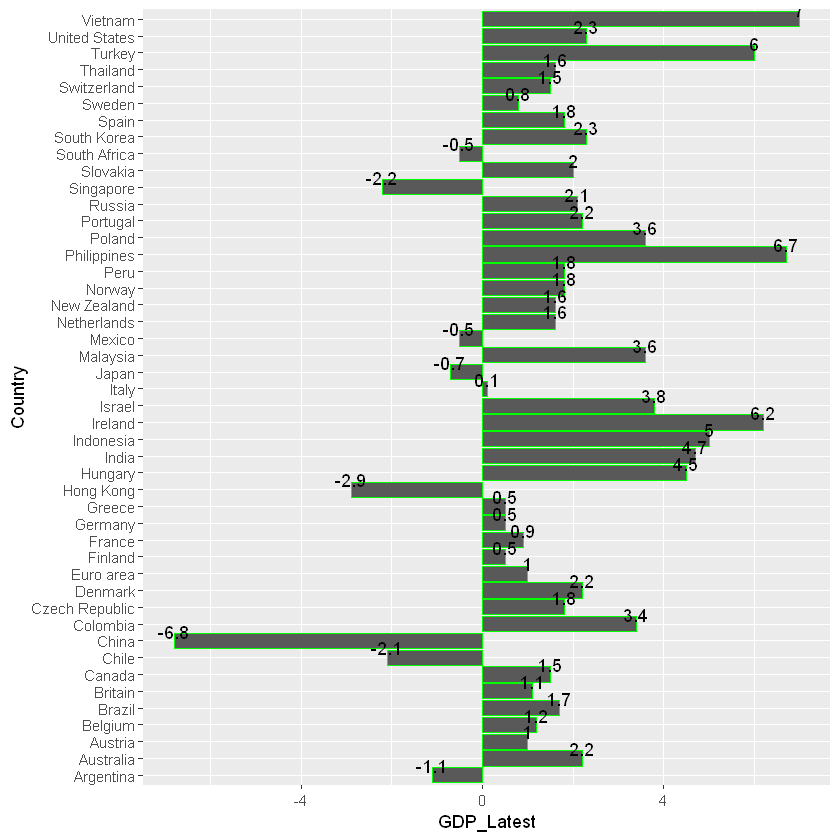

In [7]:
ggplot(fin_indicators0220, aes(x=Country, y=GDP_Latest)) + 
  geom_bar(color="green",stat = "identity") +
  coord_flip()+geom_text(aes(label=GDP_Latest), position=position_dodge(width=0.5), vjust=-0.2)


**Comparacion de Pib por Años**

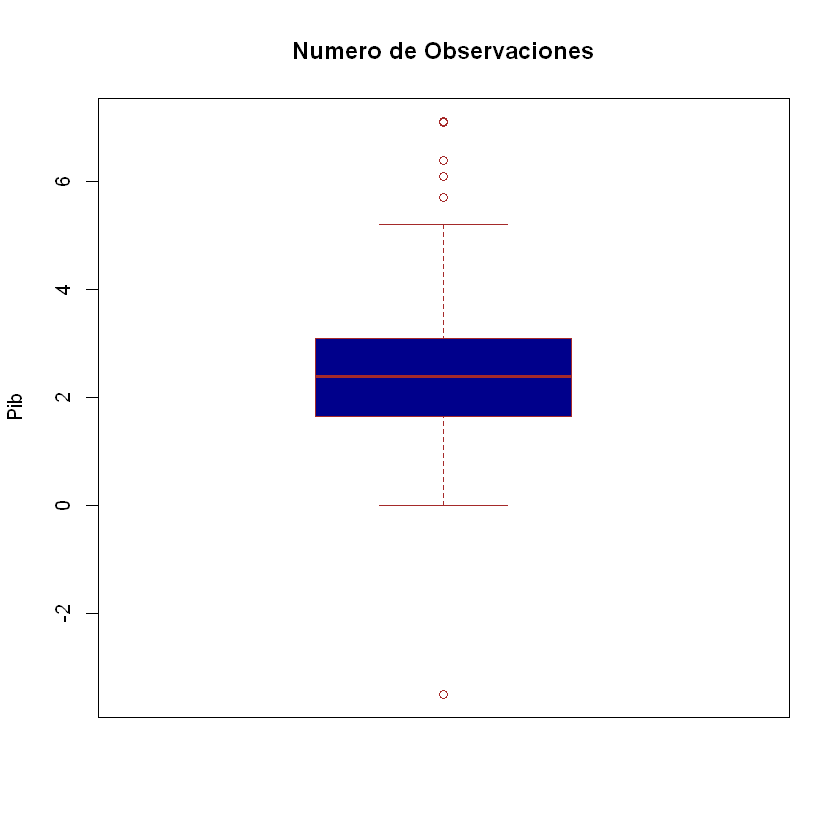

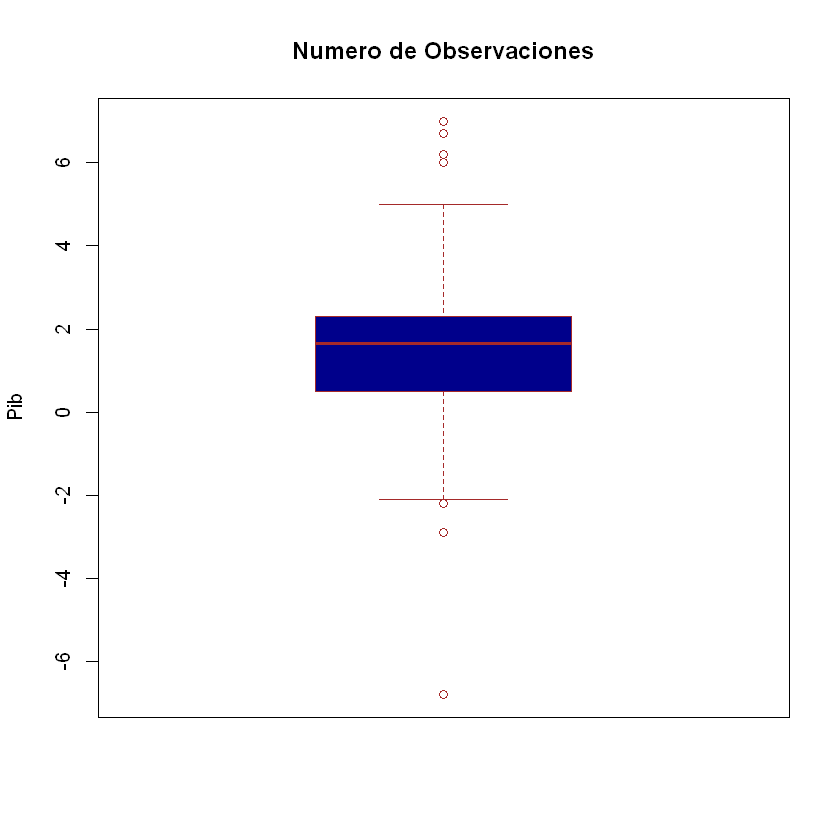

In [8]:
boxplot(fin_indicators0219$GDP_Latest,main = "Numero de Observaciones",ylab = "Pib",col = "darkblue",border = "brown")
boxplot(fin_indicators0220$GDP_Latest,main = "Numero de Observaciones",ylab = "Pib",col = "darkblue",border = "brown")



**Curvas de Andrews**

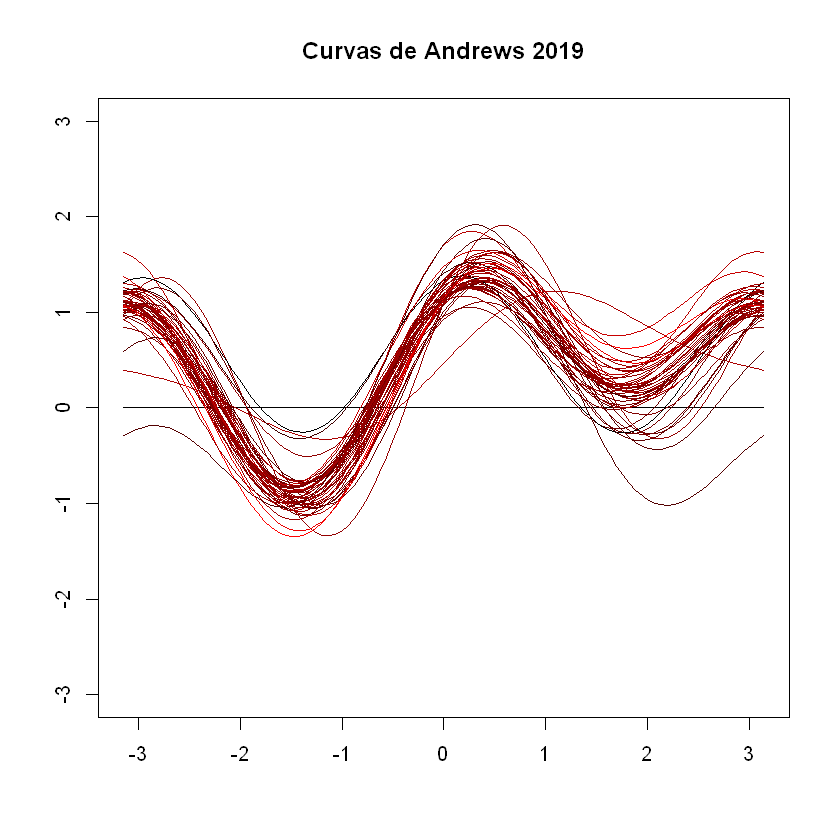

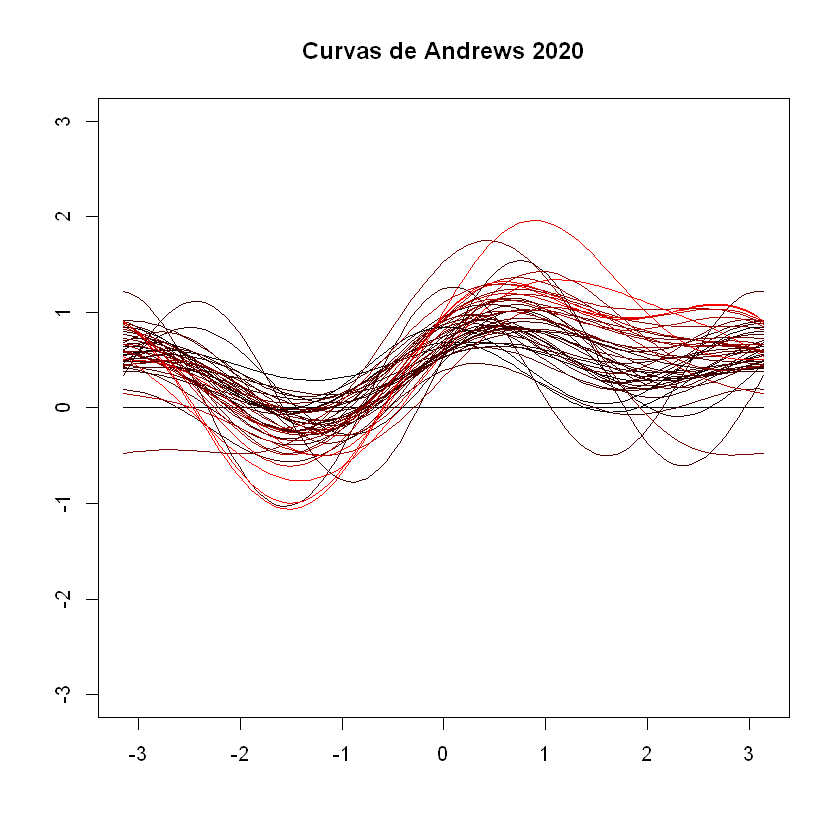

In [9]:
library(andrews)
datos <- fin_indicators0219[,c(2,3,4,5,6)]
datos1 <- fin_indicators0220[,c(2,3,4,5,6)]
andrews(datos, ymax =3,   main="Curvas de Andrews 2019", sub=NULL, clr = 2)  
andrews(datos1, ymax =3,   main="Curvas de Andrews 2020", sub=NULL, clr = 2)  


Se puede demostrar que esta representación preserva las
distancias euclídeas, en el sentido de que a dos
elementos de la población con valores similares
de las variables corresponden curvas próximas.

**Graficos de Dispersion en mas de dos dimensiones**

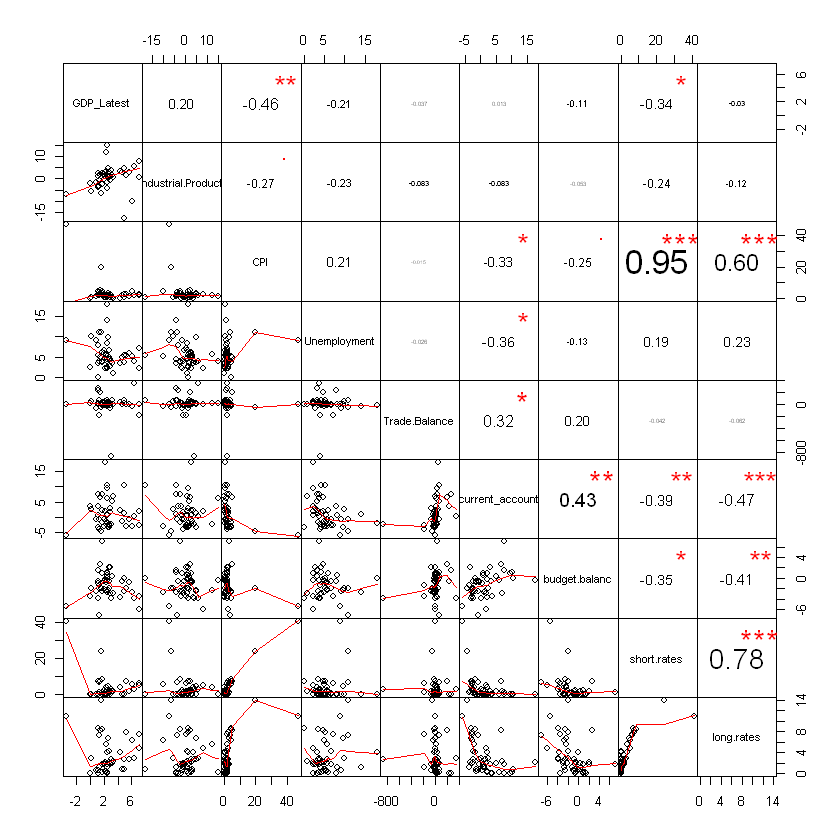

In [10]:
base =fin_indicators0219[,-1]
chart.Correlation(base, histogram = F, pch = 19)

<a id="ref4"></a>
## 4)  Análisis componentes Principales
<p><a href="#ref7"><font color = red size = 4> Inicio</font> </a></p>



**Análisis de Componentes Principales**

Es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información

In [11]:
Country <- fin_indicators0219[,2:10]
PCA_Country <- prcomp(Country,scale=T)
summary(PCA_Country)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.8234 1.2803 1.0360 0.9600 0.88967 0.7613 0.62703
Proportion of Variance 0.3694 0.1821 0.1193 0.1024 0.08795 0.0644 0.04368
Cumulative Proportion  0.3694 0.5515 0.6708 0.7732 0.86114 0.9255 0.96923
                           PC8     PC9
Standard deviation     0.51827 0.09132
Proportion of Variance 0.02984 0.00093
Cumulative Proportion  0.99907 1.00000

**Graficas**

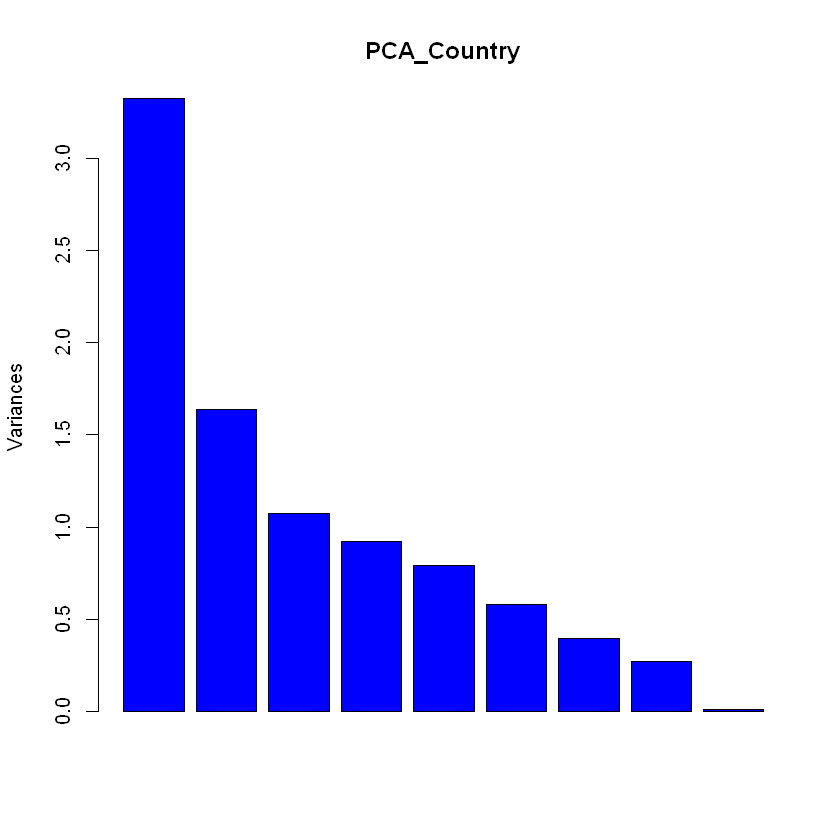

In [12]:
plot(PCA_Country,col="blue")

**Varianza Explicada**

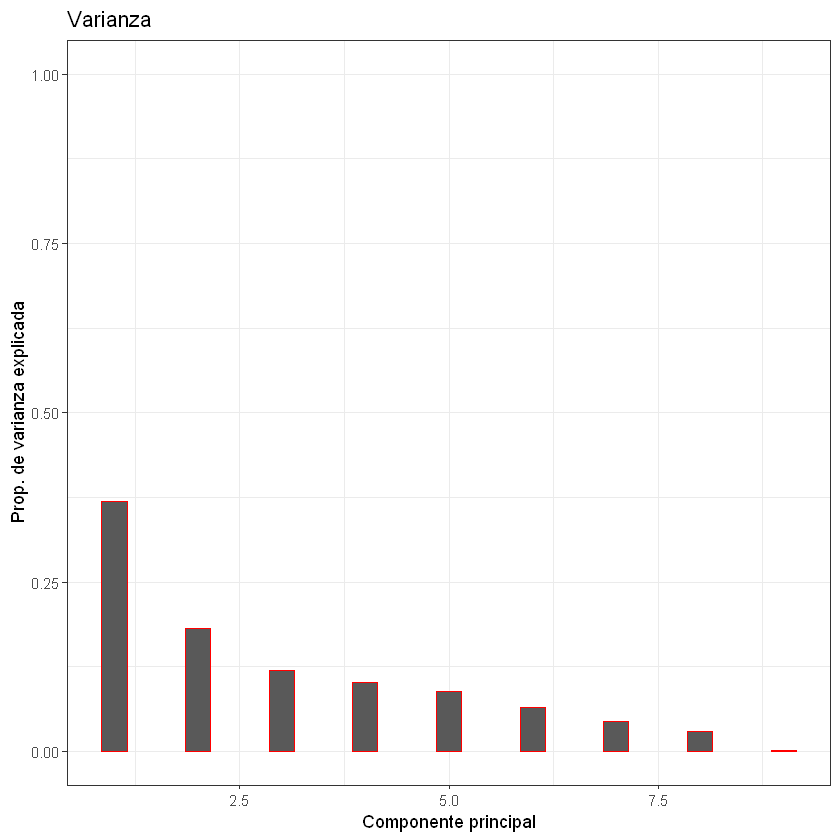

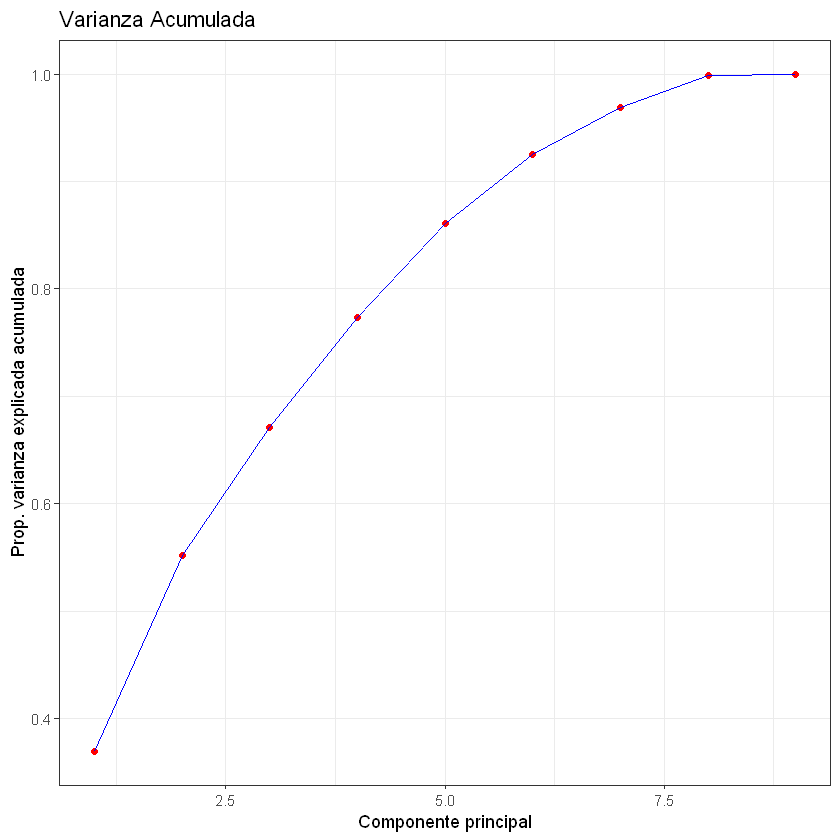

In [13]:
library(ggplot2)
## Warning: package 'ggplot2' was built under R version 3.6.3
pca <- PCA_Country
prop_varianza <- pca$sdev^2 / sum(pca$sdev^2)

ggplot(data = data.frame(prop_varianza, pc = 1:9),
       aes(x = pc, y = prop_varianza)) +
  geom_col(width = 0.3,color="red") +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. de varianza explicada") + ggtitle("Varianza")

prop_varianza_acum <- cumsum(prop_varianza)
#prop_varianza_acum

ggplot(data = data.frame(prop_varianza_acum, pc = 1:9),
       aes(x = pc, y = prop_varianza_acum, group = 1)) +
  geom_point(col="red") +
  geom_line(col="blue") +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. varianza explicada acumulada")+ggtitle("Varianza Acumulada")





**Seleccionar componentes hasta cubrir una proporción determinada de varianza, como el 80 o el 90 por ciento. Esta regla es arbitraria y debe aplicarse con cierto cuidado**

**Vamos a seleccionar 5 Componentes que explican el 86.11%**

**Cargas de Componentes**

In [14]:
CP <- PCA_Country$rotation # cargas de cada componente.
CP

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
GDP_Latest,-0.19526869,-0.46958212,0.22337934,-0.53681549,-0.285787231,0.36056284,-0.10040777,-0.4256771355,-0.018191197
Industrial.Product,-0.14978050,-0.43013348,0.26575590,0.33742798,0.712064088,0.08091644,-0.29600139,-0.0827511713,0.004453253
CPI,0.47850199,0.23171331,0.19379406,0.17749313,0.006154598,0.03711667,-0.03681865,-0.5356699590,-0.598808316
Unemployment,0.22994086,0.05415147,-0.71627599,-0.34763481,0.307914642,0.07009308,-0.43210129,-0.1497428975,0.037876594
Trade.Balance,-0.08852572,0.41105924,0.33772304,-0.59587745,0.512867149,-0.13370698,0.27033327,-0.0057940041,0.006541048
current_account,-0.33777141,0.39920636,0.26439003,-0.00542498,-0.214900540,-0.20581465,-0.75362427,0.0081724961,-0.007415822
budget.balanc,-0.27794076,0.42542870,-0.08334872,0.19706087,0.072231925,0.82769082,0.07242777,0.0005445096,0.021065277
short.rates,0.50913973,0.12204847,0.27406493,0.07275302,-0.037717794,0.11107286,-0.09722643,-0.2063192943,0.761377621
long.rates,0.44631641,-0.11676279,0.25070002,-0.21538886,-0.024208450,0.31545172,-0.24188000,0.6781723024,-0.243733062


**Seleccionamos las 5 Primeras Componenetes**

In [15]:
CP <- CP[,c(1:5)]
CP


,PC1,PC2,PC3,PC4,PC5
GDP_Latest,-0.19526869,-0.46958212,0.22337934,-0.53681549,-0.285787231
Industrial.Product,-0.14978050,-0.43013348,0.26575590,0.33742798,0.712064088
CPI,0.47850199,0.23171331,0.19379406,0.17749313,0.006154598
Unemployment,0.22994086,0.05415147,-0.71627599,-0.34763481,0.307914642
Trade.Balance,-0.08852572,0.41105924,0.33772304,-0.59587745,0.512867149
current_account,-0.33777141,0.39920636,0.26439003,-0.00542498,-0.214900540
budget.balanc,-0.27794076,0.42542870,-0.08334872,0.19706087,0.072231925
short.rates,0.50913973,0.12204847,0.27406493,0.07275302,-0.037717794
long.rates,0.44631641,-0.11676279,0.25070002,-0.21538886,-0.024208450


**Biplot**

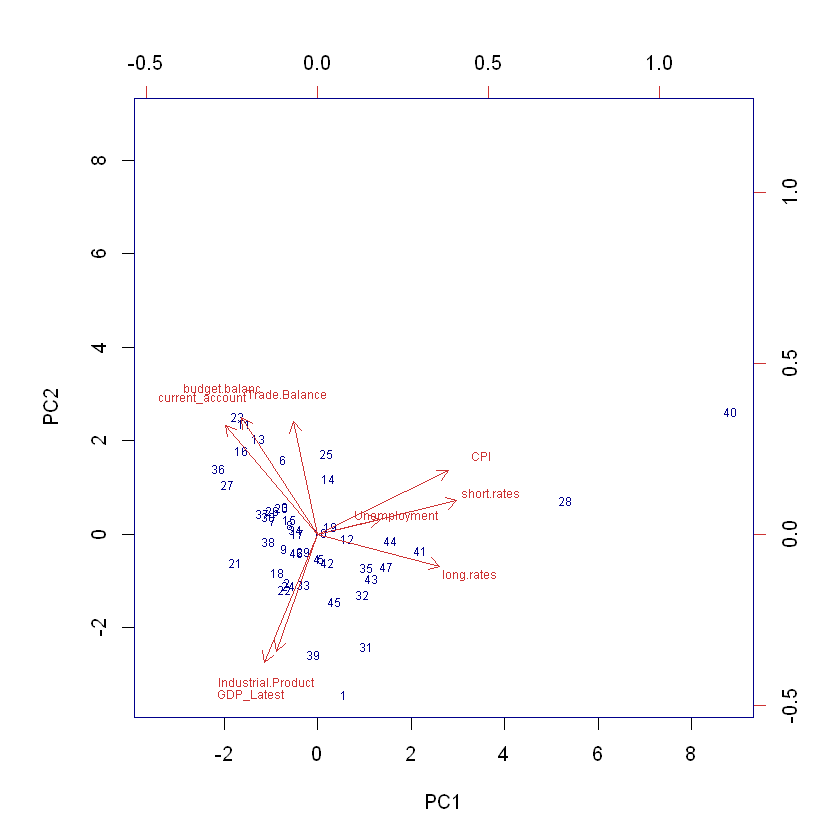

In [16]:
biplot(PCA_Country, scale = 0, cex = 0.6, col = c("blue4", "brown3"))

Tenemos tres grupos de variables que esta correlacionadas entre ellas, y sustentan una vez más la teoría económica con respecto al comportamiento de las variables Macroeconómicas:

*Grupo de las variables Ipc, Tasa de interés a corto y largo plazo y tasa de desempleo, están correlacionadas ya que el Ipc es tenido en cuenta para calcular las tasas de interés por parte del Banco de la Republica y además la tasa de desempleo esta relacionada a la forma como las compañías pueden acceder a la inversión y generar empleo, una forma de inversión es vía crédito y este depende de la tasa de interés.*

*Por otro lado, tenemos el grupo de la variable PIB y Producto industrial, es lógico que estén altamente correlacionadas ya que el PIB contiene la producción nacional de todos los servicios y Producto Industrial solamente mide la producción derivada únicamente de capital Productivo de un país.*

*Por otro lado, tenemos las variables relacionadas con el equilibrio comercial de un país, en este caso tenemos la Balanza comercial que mide el equilibrio de mercancías, es el registro económico de un país donde se recogen las importaciones y exportaciones de mercancías, y esta variable está relacionada con la cuenta corriente que tienes que ver indicador económico que resume el flujo de todos los bienes, servicios, ingresos y pagos. Estas variables son tenidas en cuenta para que el gobierne pueda generar el presupuesto nacional, en este caso la variable budget.balanc, debe estar relacionada con estas variables.*


<a id="ref5"></a>
## 5)  Algoritmos de agrupación o cluster
<p><a href="#ref7"><font color = red size = 4> Inicio</font> </a></p>



### **Agrupación Jerárquica**

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



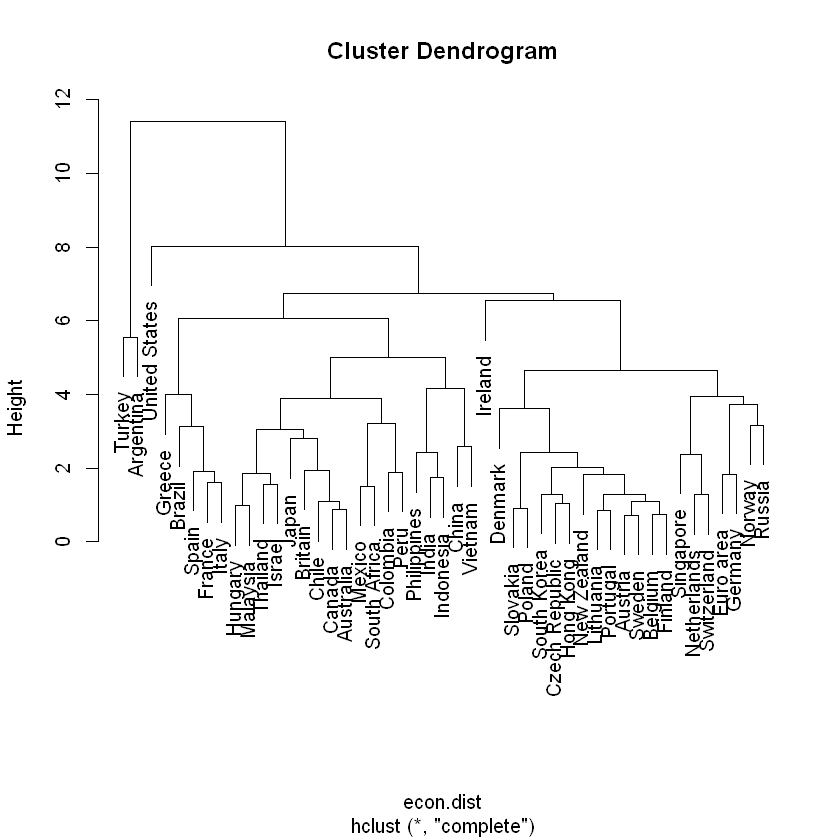

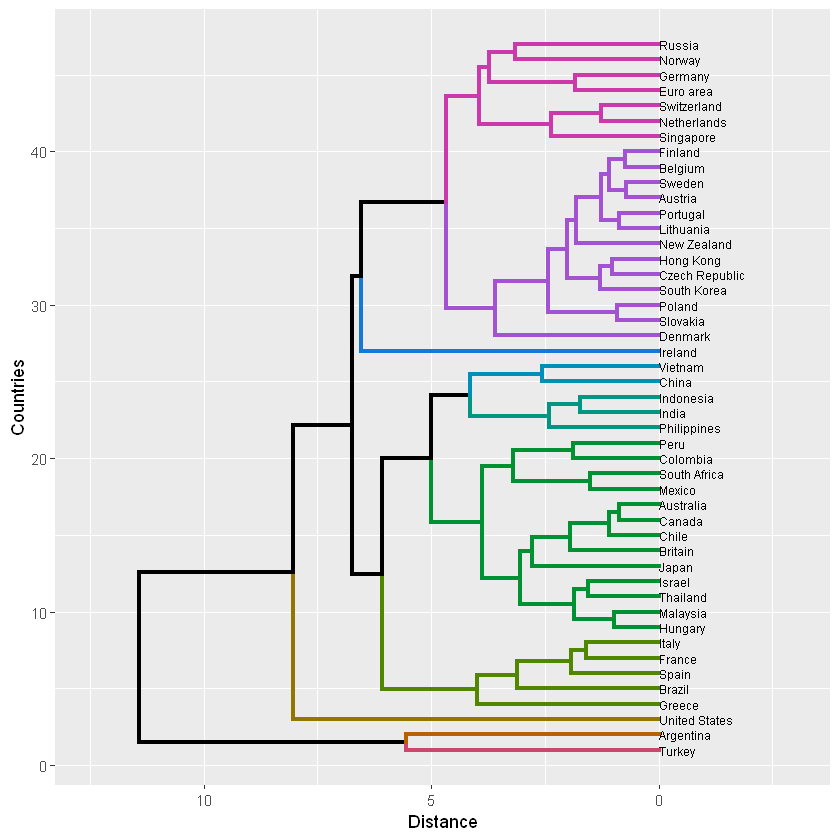

In [17]:
options(warn=-1)
#require(maggritr) ##for the forward pipe operator %>% for nicer code
econ<-read.csv('fin_indicators0219.csv')
#naming the rows
econ.df<-econ[,-1]
rownames(econ.df)<-econ[,1]
#scaling variables for use in calculation of Euclidean distance 
econ.df.scaled<-scale(econ.df)
#creating pairwise Euclidean Distance Matrix
econ.dist<-dist(econ.df.scaled, method='euclidean')
econ.hc<-hclust(econ.dist)
#plotting
plot(econ.hc)
dend <- econ.hc%>%
  as.dendrogram %>%
  set("branches_k_color", k=10) %>% set("branches_lwd", 1.4)  %>% set("labels_cex", c(0.5)) ##arbitrary k value
#now we plot using ggplot2
ggd1 <- as.ggdend(dend)
ggplot(ggd1, horiz = TRUE, theme = NULL) +
  ylab("Distance")+
  xlab("Countries") +
  ylim(c(12.5,-3)) +
  theme_grey()






### **Agrupación Jerárquica Divisional**

[1] 0.8090882

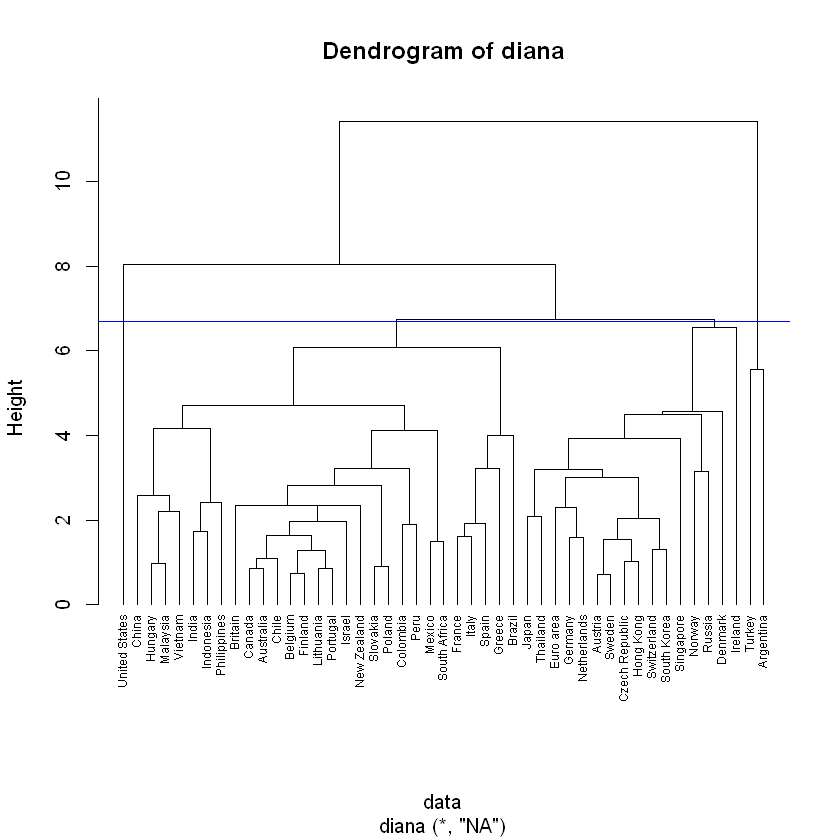

In [18]:
data <- scale(econ.df)
hc4 <- diana(data)
# Divise coefficient
hc4$dc
pltree(hc4, cex = 0.6, hang = -1, main = "Dendrogram of diana")

#d <- dist(data, method = "euclidean")
# Hierarchical clustering using Complete Linkage
#hc1 <- hclust(d, method = "complete" )
# Plot the obtained dendrogram
#plot(hc1, cex = 0.6, hang = -1)
abline(h=6.7, col="blue")



Dendograma es un árbol de clúster donde cada grupo está vinculado a dos o más grupos sucesores. Estos grupos están anidados y organizados como un árbol. Pasemos al último paso de asignar clusters a los puntos de datos. Esto se puede hacer con la función R cutree. Corta un árbol (o dendograma), como resultado de hclust (o diana / agnes), en varios grupos, especificando el número deseado de grupos (k) . Siguiendo nuestra demostración, asigne clusters para el árbol obtenido por la función diana (en la sección Agrupamiento jerárquico divisional).

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



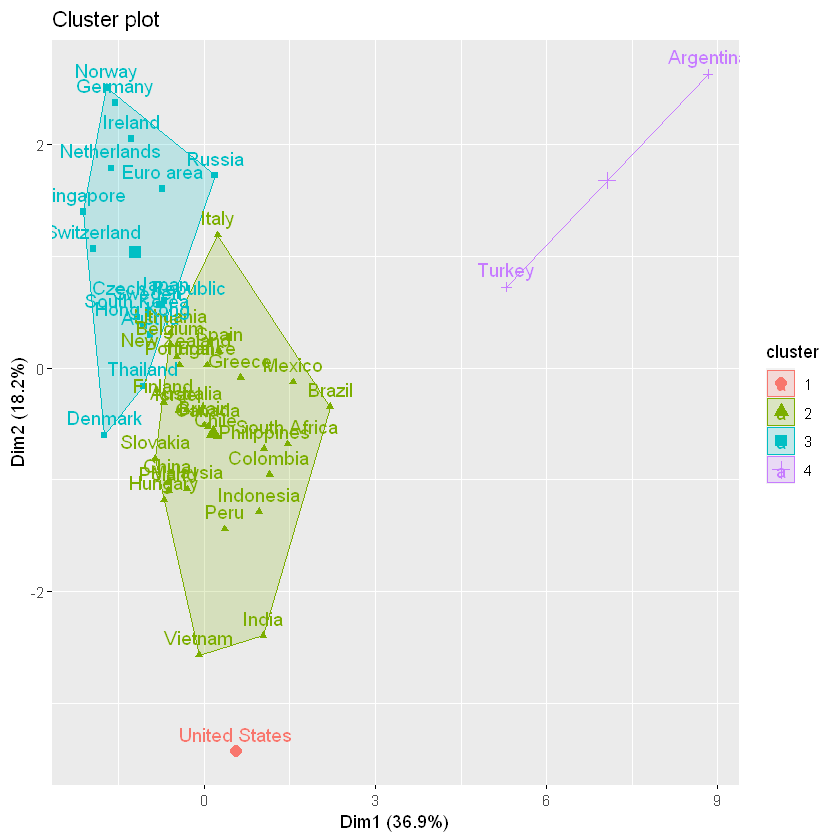

In [19]:
clust <- cutree(hc4, k = 4)
library(factoextra)
fviz_cluster(list(data = data, cluster = clust))  


### **K means**

**Metodo del Codo**

Método de codo: ayuda a elegir el valor de K que minimiza la desviación estándar dentro de cada grupo


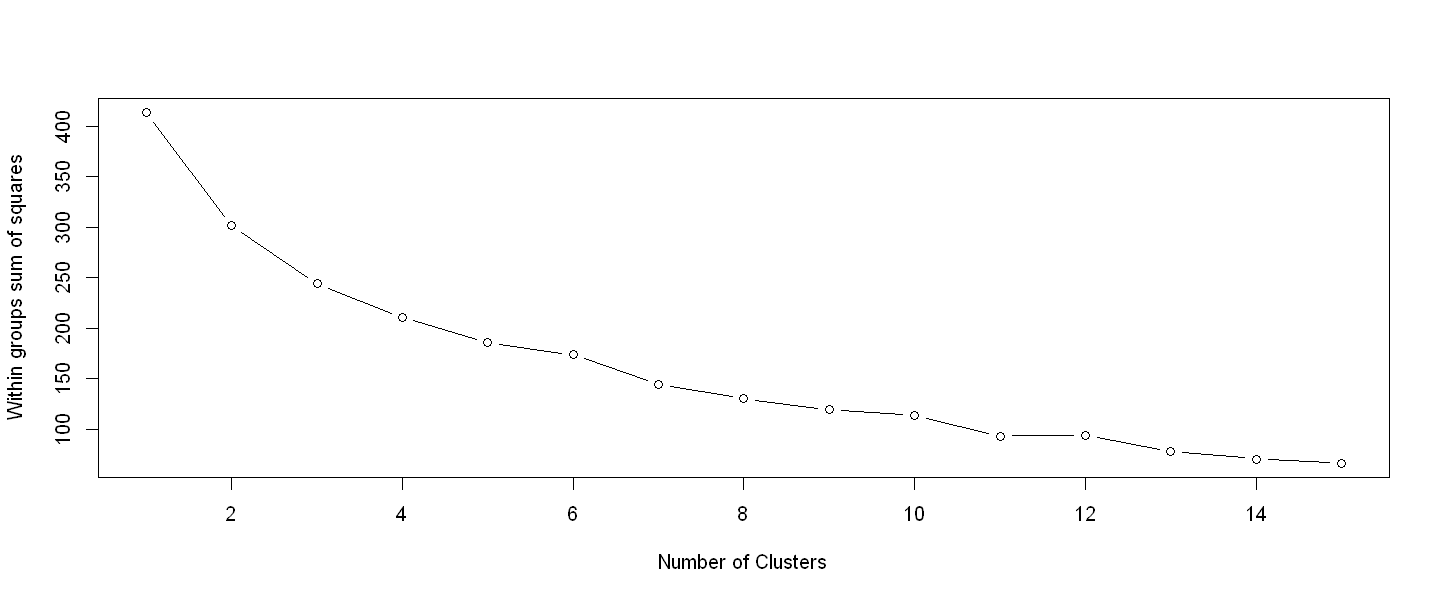

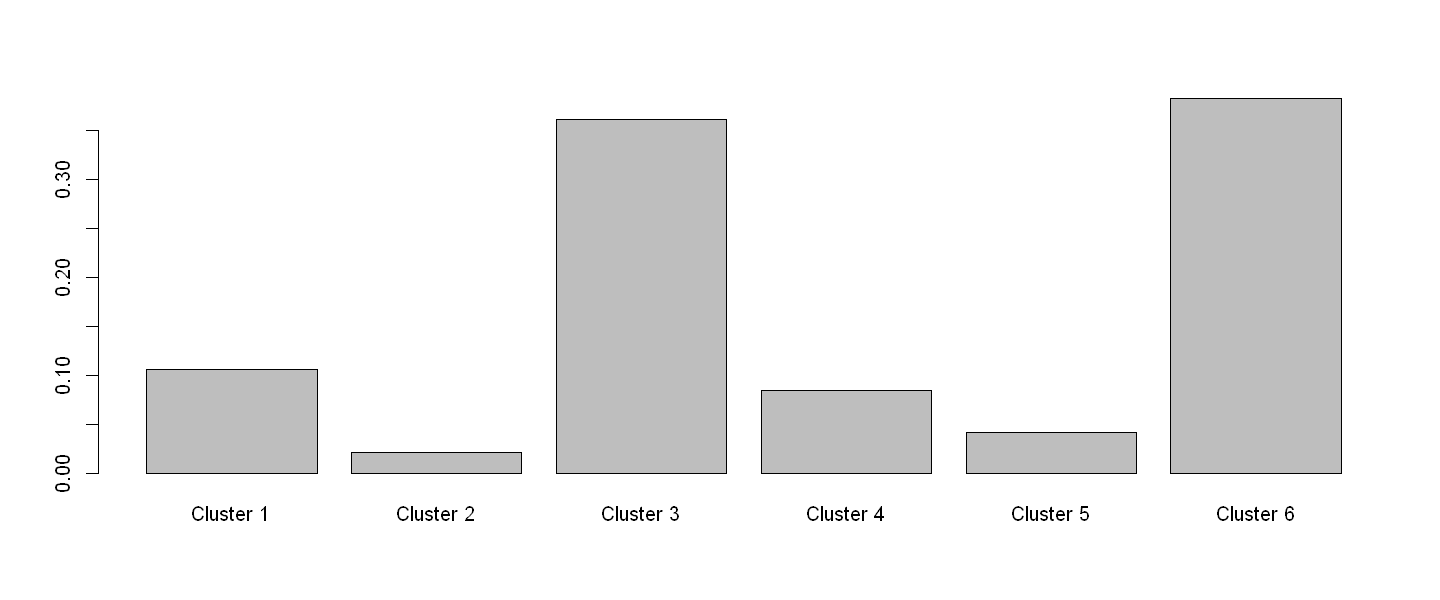

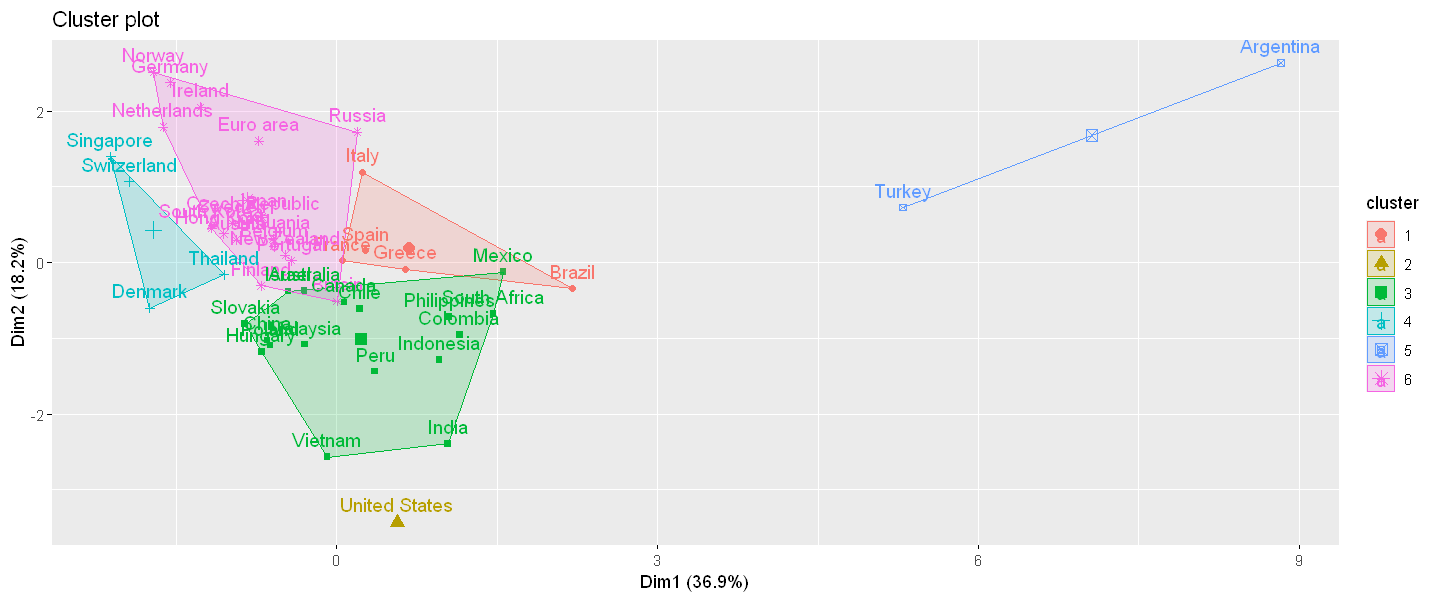

In [20]:
data <- scale(econ.df)

options(repr.plot.width=12, repr.plot.height=5)
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(data)  

kMeans = kmeans (data, centers = 6,iter.max = 10)
cluster <-as.data.frame (kMeans$cluster)

barplot(kMeans$size/dim(data)[1], names.arg=paste("Cluster",1:6))

cluster2019 <- fviz_cluster(kMeans, data = data)

cluster2019

### Comparación del Tiempo- Efecto Covid 2019

**Comparacion Medelos Jerarquicos**

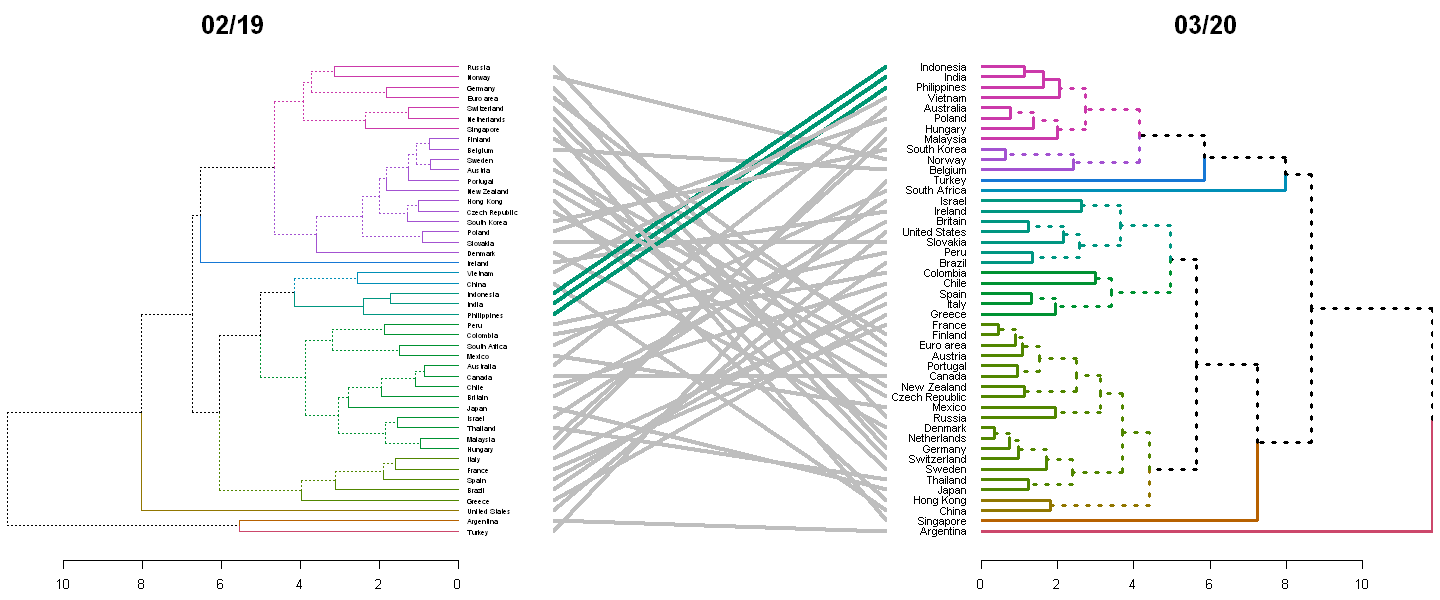

In [21]:
econ20<-read.csv('fin_indicators0220.csv')
#naming the rows
econ.df20<-econ20[,-1]
rownames(econ.df20)<-econ20[,1]
#scaling variables for use in calculation of Euclidean distance
econ.df.scaled20<-scale(econ.df20)
#creating pairwise Euclidean Distance Matrix
econ.dist20<-dist(econ.df.scaled20, method='euclidean')
#creating hierarchical clustering object
econ.hc20<-hclust(econ.dist20)
dend3 <- econ.hc20%>%
  as.dendrogram %>%
  set("branches_k_color", k=10) %>% set("branches_lwd", 2.4)  %>% set("labels_cex", c(.85))
tanglegram(dend, dend3, main_left = "02/19", main_right = "03/20", margin_inner = 6)

**Comparacion de K means**

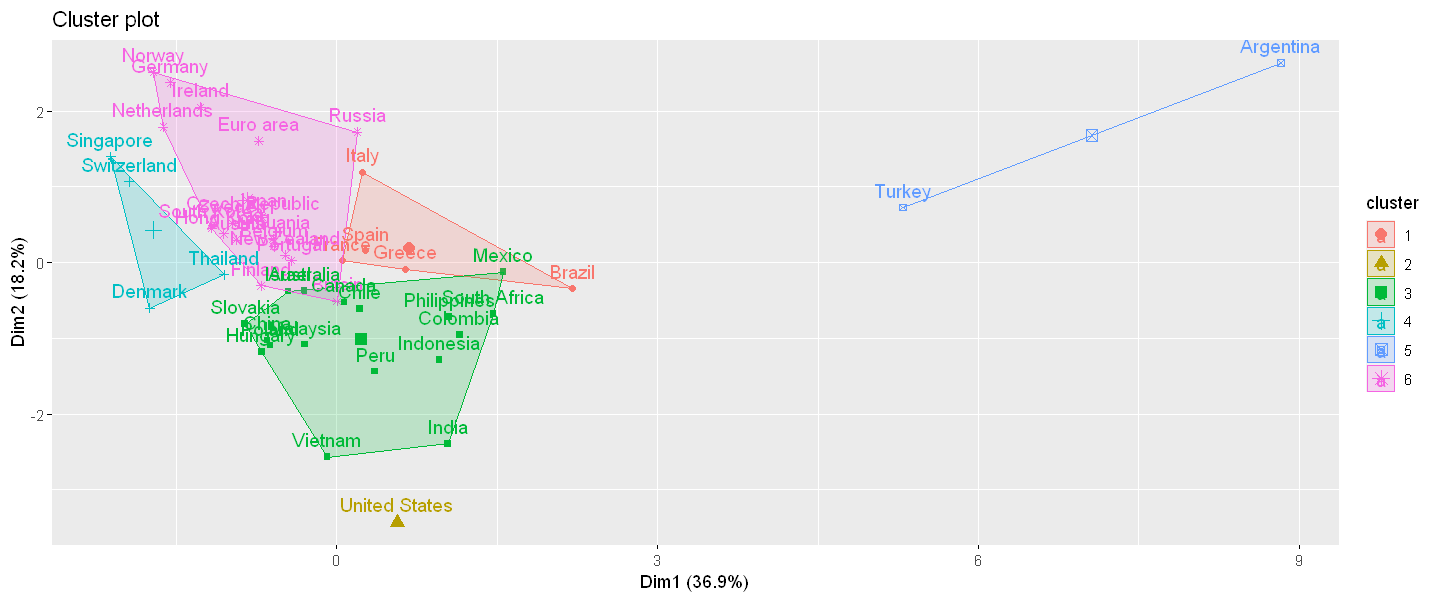

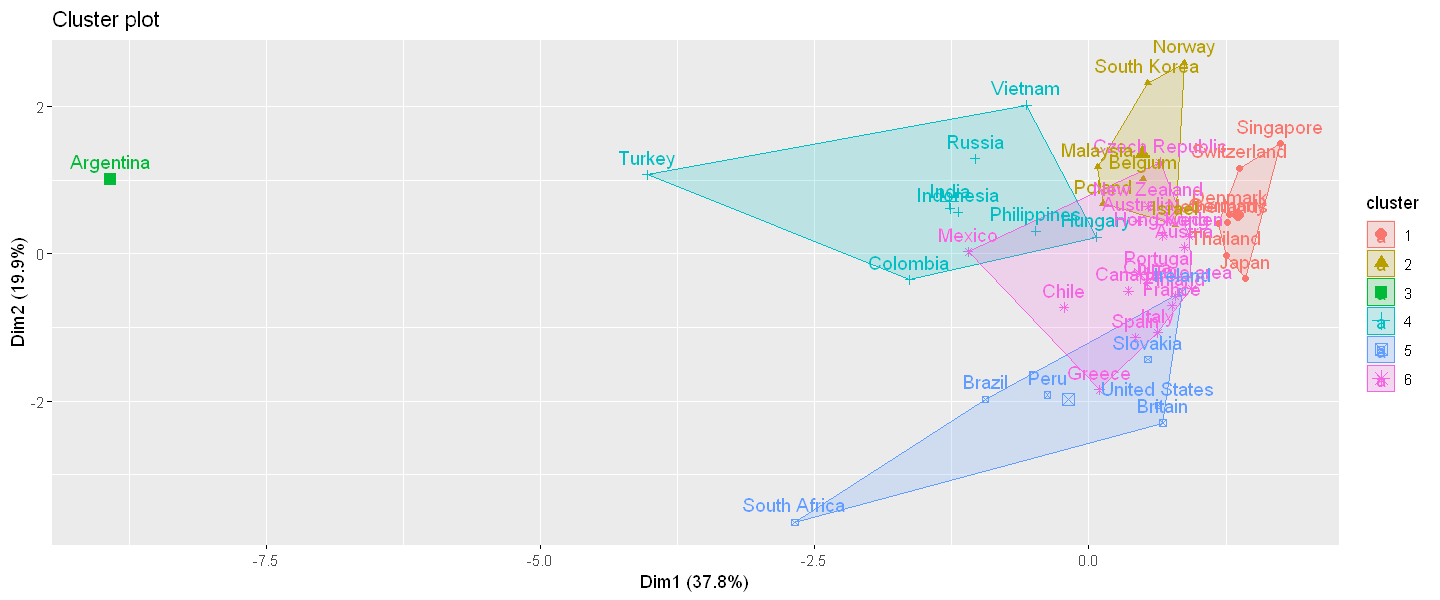

In [22]:
econ.df20 <- econ.df20[,-9]
data <- scale(econ.df20)

options(repr.plot.width=12, repr.plot.height=5)
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

#wssplot(data)  

 

kMeans = kmeans (data, centers = 6,iter.max = 10)
cluster <-as.data.frame (kMeans$cluster)

#barplot(kMeans$size/dim(data)[1], names.arg=paste("Cluster",1:6))

cluster2020 <- fviz_cluster(kMeans, data = data)
cluster2019 
cluster2020 

**Conclusion**

*Que a nivel geográfico un país cercano a otro no comparte similitudes con respecto a su economía. Y lo podemos con el ejemplo de Singapur es un vecino más cercano a Suiza que Francia, Italia o España. 
Entendemos que singapur y Suiza se asemejan en la solidez general de sus economías y su reputación de ser centros de finanzas y comercio en sus respectivas regiones.*

*También podemos ver como Turquía y Argentina son los más alejados de los grupos restantes. Esto es representativo del grado de incertidumbre económica que enfrentan ambos países mientras luchaban con la alta inflación, el alto desempleo y la caída del crecimiento.*

*Con respecto a Colombia, el algoritmo nos ubica al lado de Perú como economías similares*

*En el análisis de agrupación jerárquica que compara los dos años 2019-2020, vemos que Los únicos países que  han mantenido agrupados son Indonesia, India y Filipinas, generalmente considerados países de mercados emergentes. Turquía se ha desplazado de Argentina en función de su recuperación de su crisis monetaria un año antes, mientras que este último sigue siendo el país más atípico, sus problemas económicos aún persisten.*

*Las regiones más similares se han vuelto "más cercanas", esto nuevamente puede atribuirse al shock exógeno creado por la situación actual de pandemia, cuyos efectos han repercutido en el mundo.
 A medida que los países de todo el mundo continúan combatiendo su propagación, el efecto económico ha sido indiscriminado. Casi todas las regiones afectadas han experimentado contracciones en el crecimiento, reduciendo el consumo, tasas de desempleo récord y alguna forma de estímulo monetario o fiscal.*


**Referencias**

2 https://rpubs.com/AnithaVallikunnel/VariableSelection

3 https://rpubs.com/Joaquin_AR/287787

4 https://rpubs.com/dsolis/iris-pca-lda